<a href="https://colab.research.google.com/github/sairam21s/Upgrad-Lead-Scoring-Case-Study/blob/main/ML_LeadScoring_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required Libraries and CSVData to Dataframe

In [ ]:
#Importing Numpy and Pandas
import pandas as pd
import numpy as np

#Importing matplotlib and seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

#Importing SKLearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

#Importing statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
#Import Leads.csv into DataFrame
df_leads = pd.read_csv("/content/drive/MyDrive/Upgrad/Assignments/MLLeadScoringCaseStudy/Leads.csv")
df_leads.shape

(9240, 37)

In [ ]:
#Multiple Categorical columns has value "Select", and that needs to be handles as Null value - As Given in Problem Statement
df_leads.replace('Select',np.nan,inplace=True)

#Data Understanding

In [ ]:
#Checking sample rows from dataframe
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# describe() provides basic statistical details of numerical attributes in Dataframe
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
#Checking details of dataframe along with count of non-null values in each column
df_leads.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
#Count of unique values in each column
df_leads.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     18
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
Asymmetrique Profile Score                         10
How did you hear about X Education                  9
What is your current occupation                     6
City                                                6
Lead Origin                                         5
Lead Profile                                        5
Lead Quality                

In [ ]:
#Checking for any duplicate records
df_leads.duplicated().sum()

0

In [ ]:

#Calculating percentage of null values in each column
df_leads.isnull().mean().mul(100).round(2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

##*** Summary about initial understanding of data ***
###Data has 9240 rows and 37 columns, and does not have duplicate records
###The features TotalVisits , Total Time Spent on Website , Page Views Per Visit have outliers
###There are 30 categorical and 7 numerical variables in dataframe
###5 columns in dataframe has only same value across all records
###17 columns have null values in the dataframe

#Starting with Data Cleansing
###As per industry standard lets drop columns having more than 45% Null Values

In [ ]:
print('Columns Having >45% null values \n', df_leads.columns[df_leads.isnull().mean().mul(100) > 45])
df_leads.drop(df_leads.columns[df_leads.isnull().mean().mul(100) > 45],axis=1,inplace=True)
df_leads.shape

Columns Having >45% null values 
 Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


(9240, 30)

## 7 columns have been removed from the dataframe , having more null values

In [ ]:
# Fetch Numerical and Categorical columns from existing dataframe
#Extracting Categorical Columns
cols_cat = df_leads.select_dtypes('object').columns.tolist()

#Extracting Numerical columns
cols_num = df_leads.select_dtypes('number').columns.tolist()

#Printing Columns extracted
print('Categorial Columns - ',len(cols_cat),',','Numerical Columns - ',len(cols_num))
print(cols_num)
print(cols_cat)

Categorial Columns -  25 , Numerical Columns -  5
['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [ ]:
#Creating python function to print value_counts() for given columns in list

def print_value_counts(cols_list):
  for i in cols_list:
    print('Displaying Rows for Column - ',i)
    print(df_leads[i].value_counts(dropna=False).sort_values(ascending=False))
    print("######################################")

In [ ]:
#Printing value_counts for Numerical columns

print_value_counts(cols_num)

Displaying Rows for Column -  Lead Number
660737    1
657379    1
660321    1
660624    1
660727    1
         ..
579622    1
579615    1
579564    1
579546    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
######################################
Displaying Rows for Column -  Converted
0    5679
1    3561
Name: Converted, dtype: int64
######################################
Displaying Rows for Column -  TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
41.0        1
32.0        1
251.0       1
115.0       1
54.0        1
55.0        1
74.0        1
43.0        1
30.0        1
141.0     

#Observations from Numerical Columns

In [ ]:
#Printing value_counts for categorical columns

print_value_counts(cols_cat)

Displaying Rows for Column -  Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
d9ed7525-5cf0-45ba-87c2-ca2bca521874    1
30422ea1-36fe-465e-9e68-41ee190fefb3    1
cfa0128c-a0da-4656-9d47-0aa4e67bf690    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
                                       ..
3f715465-2546-47cd-afa8-8b8dc63b8b43    1
c0b25922-511f-4c56-852e-ced210a45447    1
19d6451e-fcd6-407c-b83b-48e1af805ea9    1
82a7005b-7196-4d56-95ce-a79f937a158d    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
######################################
Displaying Rows for Column -  Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
######################################
Displaying Rows for Column -  Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search    

#Observations from Categorical Columns

##There are columns where the values are same for all records - Which would not contribute anything towards Model
Magazine

Receive More Updates About Our Courses

Update me on Supply Chain Content

Get updates on DM Content

I agree to pay the amount through cheque

##There are columns where the values are Highly skewed towards single value - Which would not contribute anything towards Model
Do Not Call

What matters most to you in choosing a course

Search

Newspaper Article

X Education Forums

Newspaper

Digital Advertisement

Through Recommendations


In [ ]:
#Dropping columns which has only one single value

df_leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)
df_leads.shape

(9240, 25)

In [ ]:
df_cat_cols_skewed = ['Do Not Call','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

for i in df_cat_cols_skewed:
  print('############## For Column - ',i)
  print(df_leads[i].value_counts(normalize=True))
  # print(df_leads[i].value_counts(dropna=False))
  print('######################################')


############## For Column -  Do Not Call
No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64
######################################
############## For Column -  What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64
######################################
############## For Column -  Search
No     0.998485
Yes    0.001515
Name: Search, dtype: float64
######################################
############## For Column -  Newspaper Article
No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64
######################################
############## For Column -  X Education Forums
No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64
######################################
############## For Column -  Newspaper
No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64
#

In [ ]:
#Dropping columns which are skewed towards single value, as shown in above result

df_leads.drop(df_cat_cols_skewed,axis=1,inplace=True)
df_leads.shape

(9240, 17)

#After final cleaning of Categorical columns - there are 17 columns left




#Missing Values Handling


In [ ]:

#Calculating percentage of null values in each column
df_leads.isnull().mean().mul(100).round(2).sort_values(ascending=False)

City                                      39.71
Specialization                            36.58
Tags                                      36.29
What is your current occupation           29.11
Country                                   26.63
Page Views Per Visit                       1.48
TotalVisits                                1.48
Last Activity                              1.11
Lead Source                                0.39
A free copy of Mastering The Interview     0.00
Prospect ID                                0.00
Lead Number                                0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Do Not Email                               0.00
Lead Origin                                0.00
Last Notable Activity                      0.00
dtype: float64

In [ ]:
df_leads.City.value_counts(dropna=False)

# In column City there are around 40% missing values, and also rest of values does not make sense other than Mumbai , Thane & Outskirts
# Hence dropping the column

df_leads.drop(['City'],axis=1,inplace=True)


In [ ]:
df_leads.Specialization.value_counts(normalize=True)

# In Column Specialization there are around 36% missing values, and also no other variable which is most occuring which does not allow to impute with mode
# Hence dropping the column

df_leads.drop(['Specialization'],axis=1,inplace=True)

In [ ]:
df_leads.Tags.value_counts(normalize=True)

#Tags are assigned with current status, and the status are not much useful as they change frequently
# Hence dropping the column

df_leads.drop(['Tags'],axis=1,inplace=True)

In [ ]:
df_leads['What is your current occupation'].value_counts(normalize=True)

# There are around 29% missing values , we can impute Null values with "Missing"

df_leads['What is your current occupation'].fillna("Missing",inplace=True)
df_leads['What is your current occupation'].value_counts(normalize=True)


Unemployed              0.606061
Missing                 0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [ ]:
df_leads['Country'].value_counts(normalize=True).mul(100).round(2)
# There are around 26% missing values , While Variable is skewed towards Single value India 95%
# Hence dropping the column

df_leads.drop(['Country'],axis=1,inplace=True)


In [ ]:
#Calculating null values for remaining columns
df_leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               137
Page Views Per Visit                      137
Last Activity                             103
Lead Source                                36
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [ ]:
df_leads.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [ ]:
# For feature TotalVisits - max value is not close to 75%, Max value looks like outlier. Hence imputing the value with Median
df_leads.TotalVisits.fillna(df_leads.TotalVisits.median(),inplace=True)
df_leads.TotalVisits.describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [ ]:
# For feature Page Views Per Visit - max value is not close to 75%, Max value looks like outlier. Hence imputing the value with Median
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].median(),inplace=True)
df_leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [ ]:
# For Feature df_leads['Last Activity'] - filling null values with Mode value "Email Opened" is most frequent
df_leads['Last Activity'].fillna(df_leads['Last Activity'].mode()[0],inplace=True)
df_leads['Last Activity'].value_counts(dropna=False,normalize=True).mul(100)

# df_leads['Last Activity'].mode()[0]

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [ ]:
# For Feature df_leads['Last Activity'] - imputing values <1% of data to Others
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked','Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'],"Other Last Activity")
df_leads['Last Activity'].value_counts(dropna=False,normalize=True).mul(100)

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Other Last Activity           1.212121
Unreachable                   1.006494
Name: Last Activity, dtype: float64

In [ ]:
# For Feature df_leads['Lead Source'] - filling null values with Mode value "Google" is most frequent
df_leads['Lead Source'].fillna(df_leads['Lead Source'].mode()[0],inplace=True)

df_leads['Lead Source'].value_counts(dropna=False,normalize=True).mul(100)

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [ ]:
# For Feature df_leads['Lead Source'] - imputing low frequency values <1% of data to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['Facebook','bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM'],'Other Lead Source')

# Replacing duplicate value "google" with "Google"
df_leads['Lead Source'] = df_leads['Lead Source'].replace('google','Google')

df_leads['Lead Source'].value_counts(dropna=False,normalize=True).mul(100)

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Other Lead Source     0.844156
Name: Lead Source, dtype: float64

In [ ]:
# Verifying null values in Dataframe
df_leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

###Data is clean from missing values, checking other features for data

In [ ]:
df_leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [ ]:
df_leads['Do Not Email'].value_counts(dropna=False,normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [ ]:
df_leads['Converted'].value_counts(dropna=False)

0    5679
1    3561
Name: Converted, dtype: int64

In [ ]:
df_leads['Total Time Spent on Website'].value_counts(dropna=False,normalize=True).mul(100)

0       23.733766
60       0.205628
74       0.194805
75       0.194805
127      0.194805
          ...    
1701     0.010823
1952     0.010823
1229     0.010823
1743     0.010823
927      0.010823
Name: Total Time Spent on Website, Length: 1731, dtype: float64

In [ ]:
df_leads['Lead Origin'].value_counts(dropna=False,normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [ ]:
df_leads['Last Notable Activity'].value_counts(dropna=False,normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

In [ ]:
#Removing features that do not have impact on model
df_leads.drop('Lead Number',axis=1,inplace=True)
df_leads.drop('Prospect ID',axis=1,inplace=True)

# Last Notable Activity is performed by Student, and the action change frequently - Hence removing the feature
df_leads.drop('Last Notable Activity',axis=1,inplace=True)

# Also the feature 'Do Not Email' is highly skewed towards single value, and has value "No" for 92% of records  hence dropping column
df_leads.drop('Do Not Email',axis=1,inplace=True)

In [ ]:
#Final shape of dataframe, that is available after data cleaning
df_leads.shape

(9240, 9)

#Outlier Handling with Univariate Analysis

In [ ]:
# Fetch Numerical and Categorical columns from existing dataframe
#Extracting Categorical Columns
cols_cat = df_leads.select_dtypes('object').columns.tolist()

#Extracting Numerical columns
cols_num = df_leads.select_dtypes('number').columns.tolist()
cols_num.remove('Converted') #This is target variable

#Printing Columns extracted
print('Categorial Columns - ',len(cols_cat),',','Numerical Columns - ',len(cols_num))
print(cols_num)
print(cols_cat)

Categorial Columns -  5 , Numerical Columns -  3
['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'A free copy of Mastering The Interview']


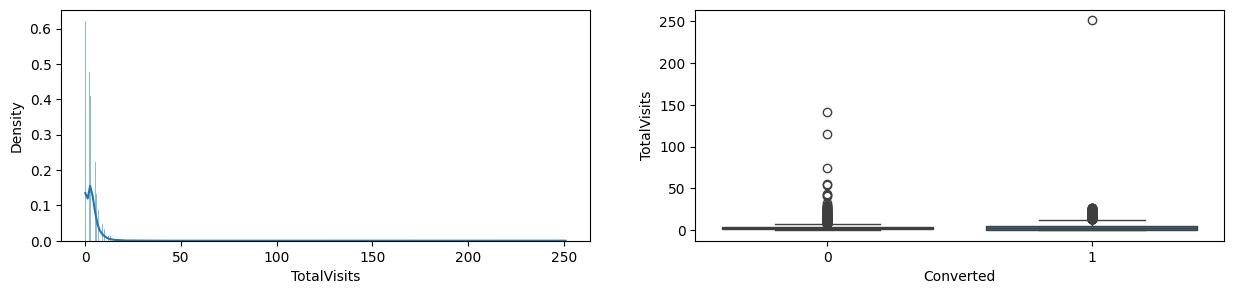

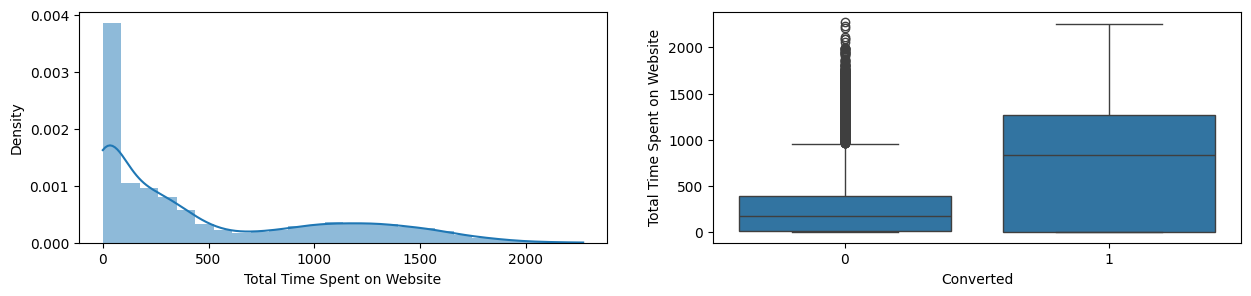

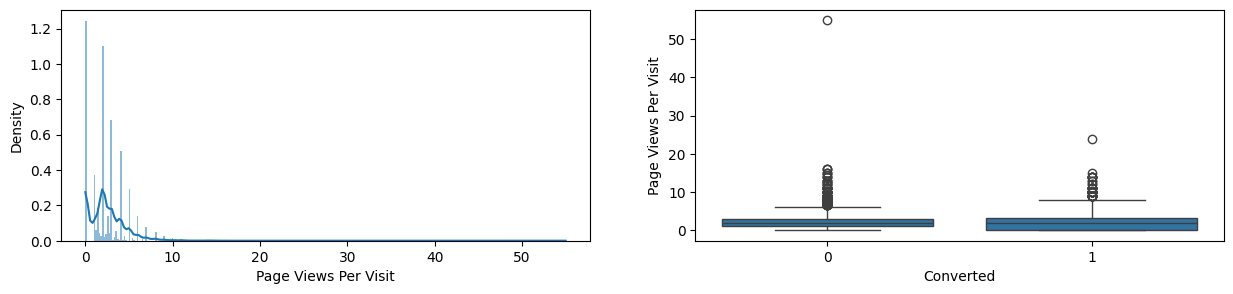

In [ ]:
for i in cols_num:
  plt.figure(figsize=(15,3))
  plt.subplot(1,2,1)
  sns.histplot(df_leads[i], kde=True, stat="density", linewidth=0)
  plt.subplot(1,2,2)
  sns.boxplot(y=df_leads[i],x=df_leads.Converted)
  plt.show()

In [ ]:
#Before Outlier treatment
df_leads.TotalVisits.describe(percentiles = [0,0.05,0.10,0.25,0.5,0.75,0.90,0.95,0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
0%          0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [ ]:
# Capping Data at 99th percentile

df_leads.TotalVisits = np.where(df_leads.TotalVisits >= df_leads.TotalVisits.quantile(0.99),df_leads.TotalVisits.quantile(0.99),df_leads.TotalVisits)

#Verifying "TotalVisits" after Outlier Treatment
df_leads.TotalVisits.describe(percentiles = [0,0.05,0.10,0.25,0.5,0.75,0.90,0.95,0.99])

count    9240.000000
mean        3.327814
std         3.228466
min         0.000000
0%          0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [ ]:
# Before Outlier Treatment
df_leads['Total Time Spent on Website'].describe(percentiles = [0,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
0%          0.000000
5%          0.000000
10%         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [ ]:
df_leads['Total Time Spent on Website'] = np.where(df_leads['Total Time Spent on Website'] >= df_leads['Total Time Spent on Website'].quantile(0.99),
                                                   df_leads['Total Time Spent on Website'].quantile(0.99),df_leads['Total Time Spent on Website'])

#Verifying "Total Time Spent on Website" after Outlier Treatment
df_leads['Total Time Spent on Website'].describe(percentiles = [0,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    9240.000000
mean      486.510793
std       544.845436
min         0.000000
0%          0.000000
5%          0.000000
10%         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.372100
max      1840.610000
Name: Total Time Spent on Website, dtype: float64

In [ ]:
df_leads['Page Views Per Visit'].describe(percentiles = [0,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
0%          0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [ ]:
df_leads['Page Views Per Visit'] = np.where(df_leads['Page Views Per Visit'] >= df_leads['Page Views Per Visit'].quantile(0.99),
                                                   df_leads['Page Views Per Visit'].quantile(0.99),df_leads['Page Views Per Visit'])

#Verifying "Page Views Per Visit" after Outlier Treatment
df_leads['Page Views Per Visit'].describe(percentiles = [0,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    9240.000000
mean        2.329050
std         1.971347
min         0.000000
0%          0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

#Bivariate Analysis

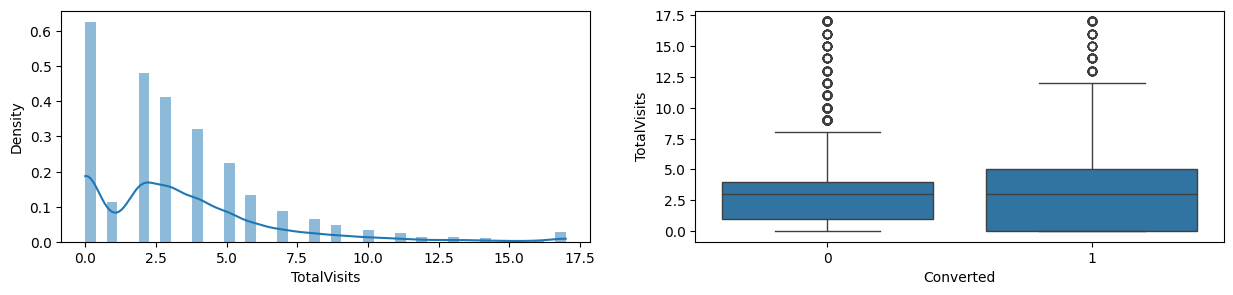

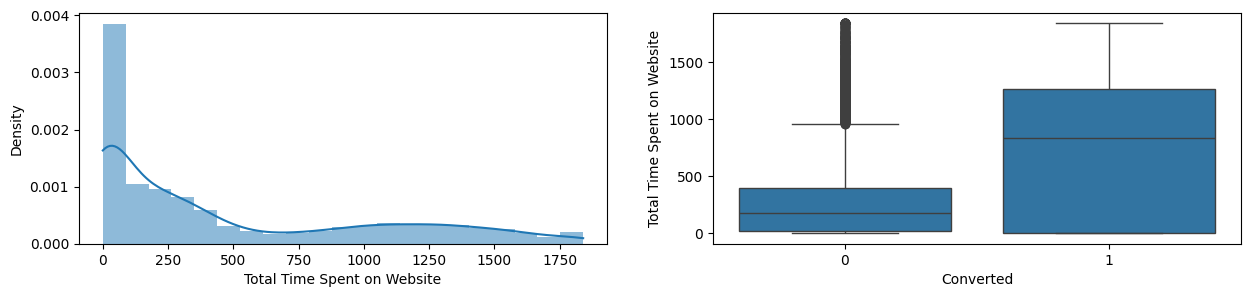

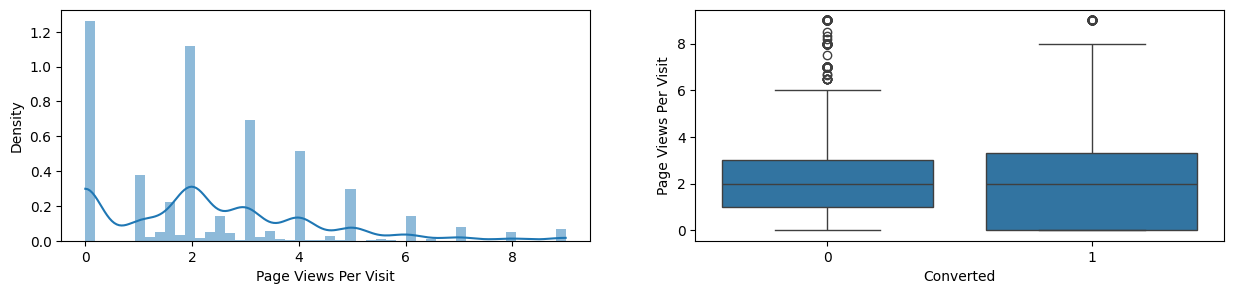

In [ ]:
#Analyzing Numerical columns after fixing Outliers

for i in cols_num:
  plt.figure(figsize=(15,3))
  plt.subplot(1,2,1)
  sns.histplot(df_leads[i], kde=True, stat="density", linewidth=0)
  plt.subplot(1,2,2)
  sns.boxplot(y=df_leads[i],x=df_leads.Converted)
  plt.show()

#Inference from above numerical Variables
###Higher number of visits have higher chances of converting from Lead to Admission
###Higher Amount of time spent on website have higher chances of converting form Lead to Admission
###Having visits below 3 pages per visit has higher chances of converting from Lead to Admission

#Bivariate analysis with Categorical columns

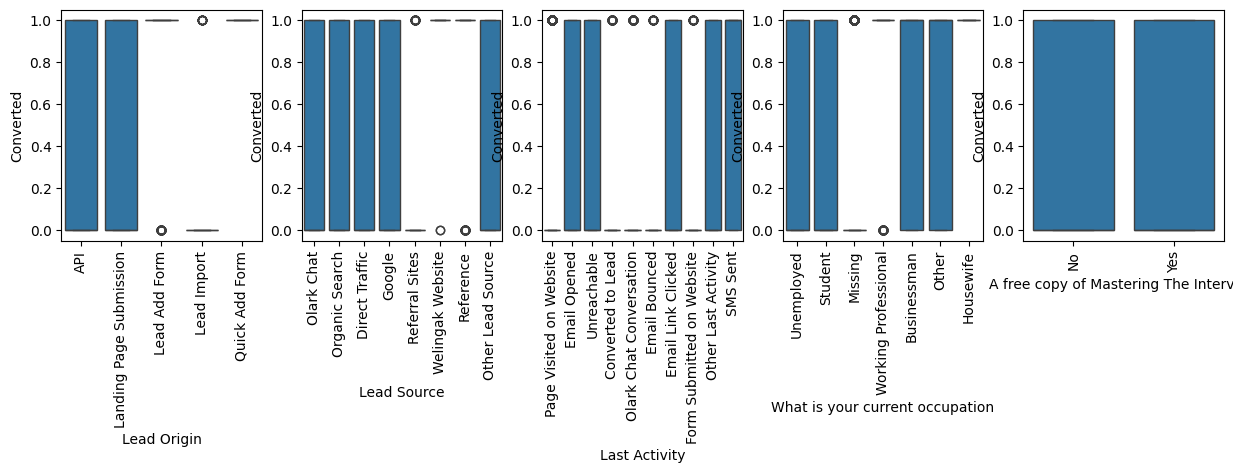

In [ ]:
plt.figure(figsize=(15,3))
for i in range(len(cols_cat)):
  plt.subplot(1,5,1+i)
  plt.xticks(rotation=90)
  sns.boxplot(data=df_leads ,y='Converted',x=cols_cat[i])

plt.show()

#MultiVariate Analysis - Numerical Values

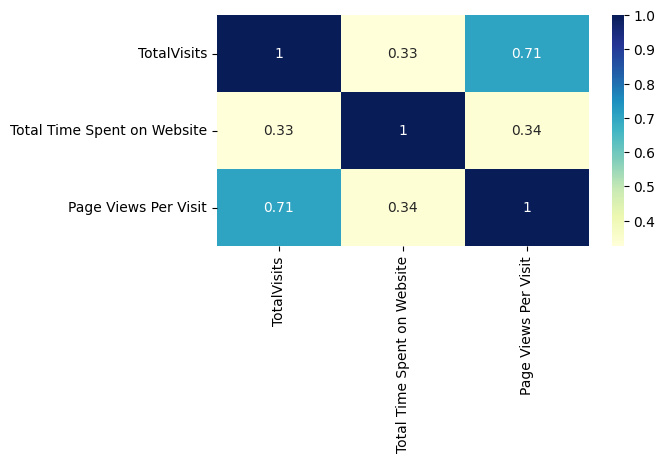

In [ ]:
# correlations = df_leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr()
# print(correlations)

plt.figure(figsize=(6,3))
sns.heatmap(data=df_leads[cols_num].corr(),annot=True,cmap='YlGnBu')
plt.show()

#Inference from above MultiVariate Analysis - Numerical Values
###There is a strong collinearity between both variables "Total Visits" and "Page views per visit" - We can also choose to drop one of the variable as keeping both of them does not significantly contribute to the model prediction.

#Preparing Data for Model Building

In [ ]:
# Checking categorical variables - if there are any Binary Categorical Variables
for i in cols_cat:
  print('\nValues of Variable - \"',i,'\" are :: ',df_leads[i].unique())
##Mapping Binary Categorical Variables like
###A free copy of Mastering The Interview
# handle free copy of mastering interview to binary


Values of Variable - " Lead Origin " are ::  ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']

Values of Variable - " Lead Source " are ::  ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'Other Lead Source']

Values of Variable - " Last Activity " are ::  ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Other Last Activity'
 'SMS Sent']

Values of Variable - " What is your current occupation " are ::  ['Unemployed' 'Student' 'Missing' 'Working Professional' 'Businessman'
 'Other' 'Housewife']

Values of Variable - " A free copy of Mastering The Interview " are ::  ['No' 'Yes']


In [ ]:
# Varaible " A free copy of Mastering The Interview " is a Binary Categorical Variable, hence we can convert it into a numerical variable
df_leads['A free copy of Mastering The Interview'] = df_leads['A free copy of Mastering The Interview'].astype('category').cat.codes

#After converting binary categorical to numerical , the values of Column are
df_leads['A free copy of Mastering The Interview'].unique()

array([0, 1], dtype=int8)

In [ ]:
#Checking Data-Types of variables
df_leads.info()

#Now we can observe that the variable "A free copy of Mastering The Interview" is converted to numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   float64
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   What is your current occupation         9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   int8   
dtypes: float64(3), int64(1), int8(1), object(4)
memory usage: 586.6+ KB


#Data Preparation

###Dummy Variables - Create Dummy variables for categorical variables with multiple levels

In [ ]:
cols_catd = df_leads.select_dtypes('object').columns.tolist()
print(cols_cat)

['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'A free copy of Mastering The Interview']


In [ ]:
df_leads_dummies = pd.get_dummies(df_leads[cols_catd],drop_first=True)

df_leads = pd.concat([df_leads,df_leads_dummies],axis = 1)

In [ ]:
pd.set_option('display.max_columns', None)

df_leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0.0,0.0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674.0,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Email Opened,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Unreachable,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428.0,1.0,Converted to Lead,Unemployed,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Dropping categorical variables that are already converted into dummy variables

df_leads.drop(cols_catd,axis=1,inplace=True)

In [ ]:
df_leads.shape

(9240, 31)

In [ ]:
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,2.0,1428.0,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#Correlation Check for Dataframe

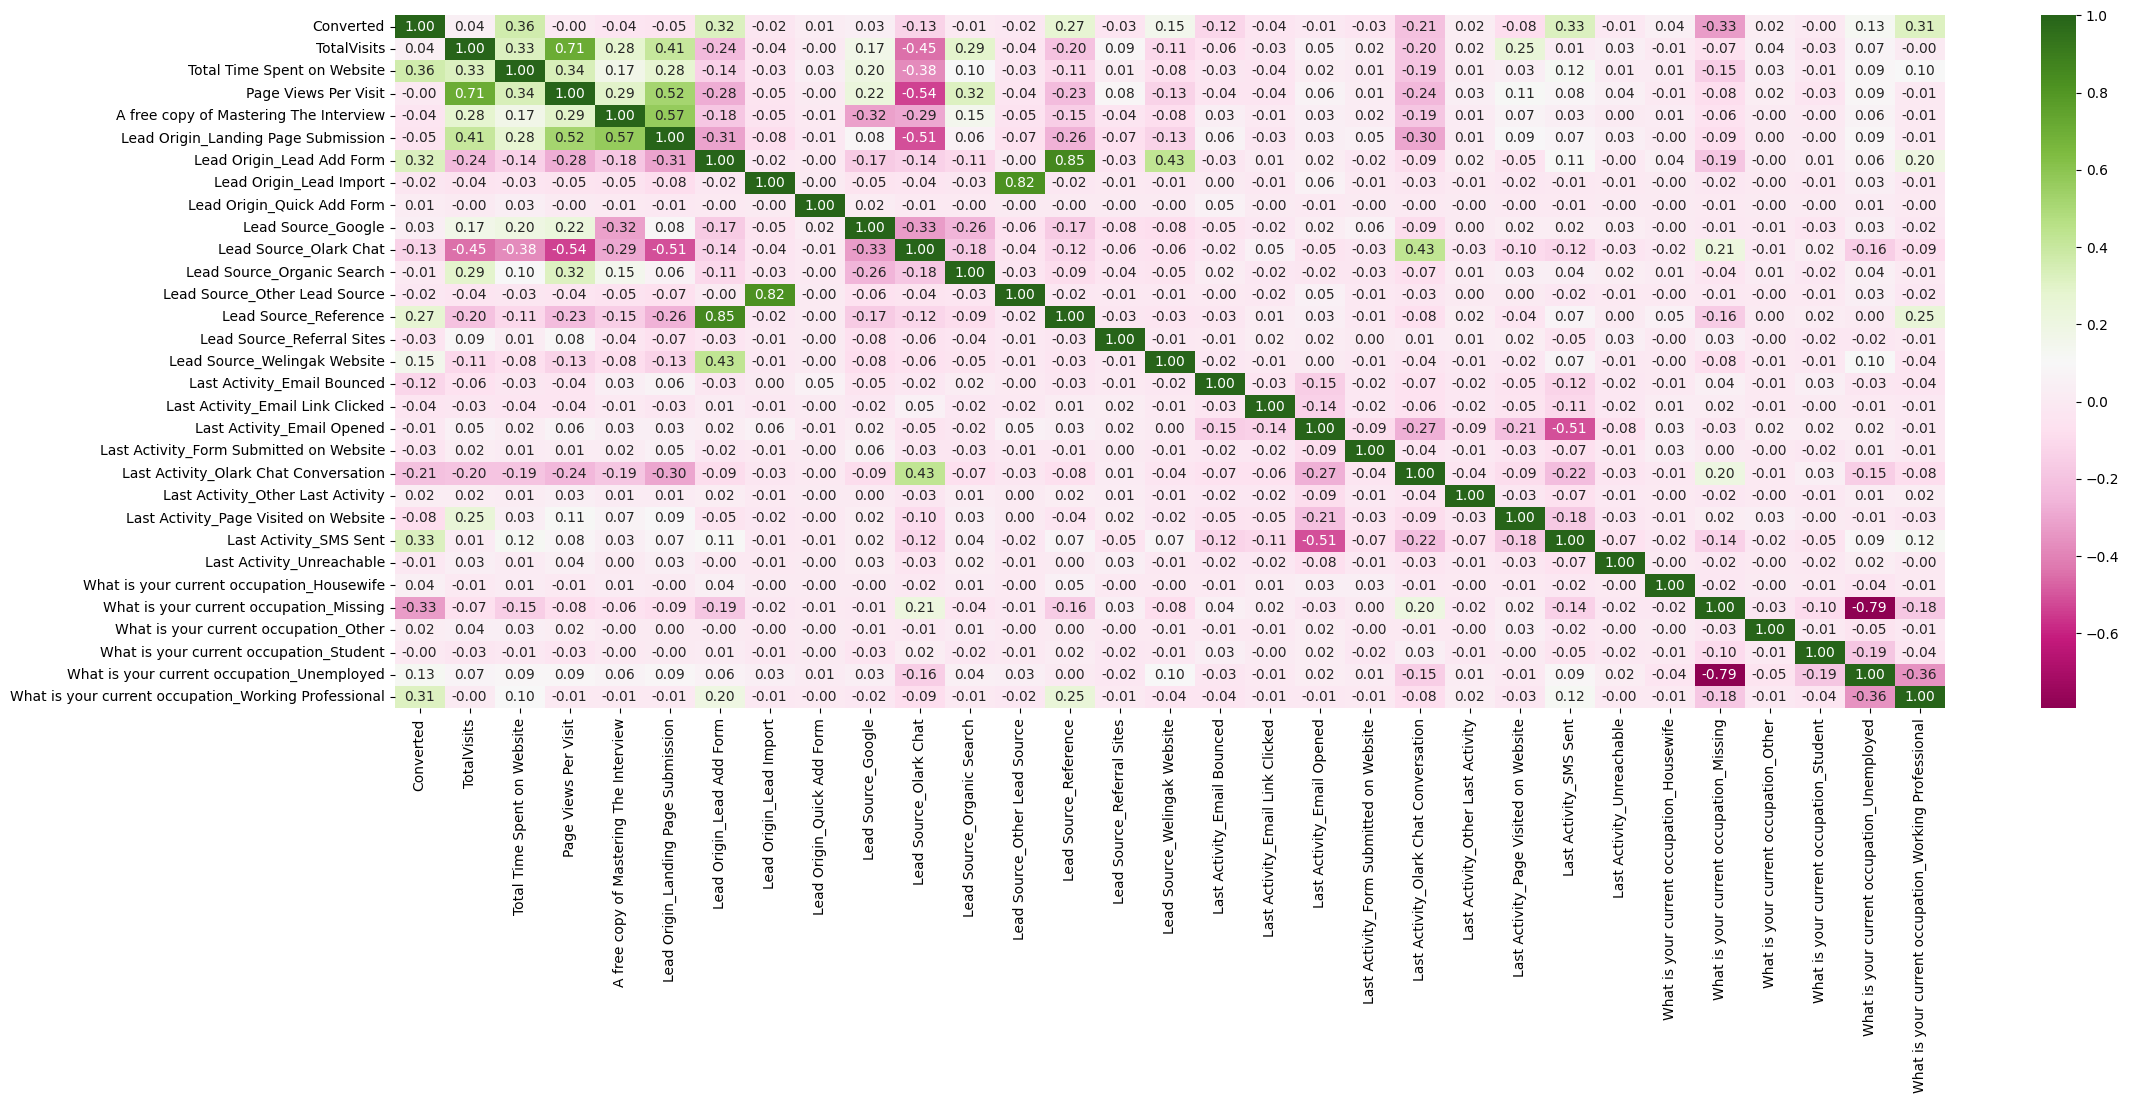

In [ ]:
  plt.figure(figsize=(25,9))
  sns.heatmap(df_leads.corr(),annot=True,fmt='.2f',cmap='PiYG')
  #cmap='YlGnBu','coolwarm'
  plt.show()

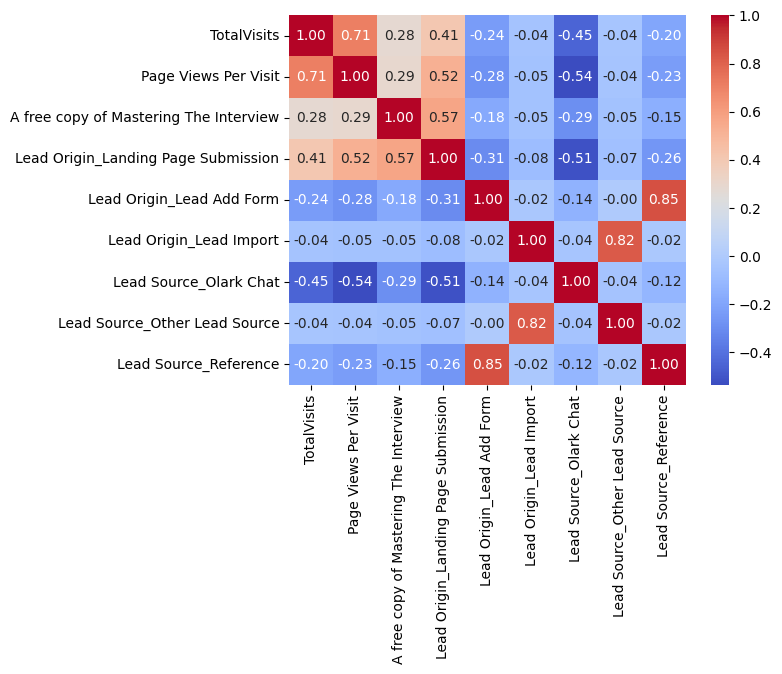

In [ ]:
#Above heatmap has so many features, below are the key features that have high correlation among them from the dataframe created with dummy variables.
cols_corr = ['TotalVisits','Page Views Per Visit','A free copy of Mastering The Interview','Lead Origin_Landing Page Submission','Lead Origin_Lead Add Form','Lead Origin_Lead Import','Lead Source_Olark Chat','Lead Source_Other Lead Source','Lead Source_Reference']
sns.heatmap(df_leads[cols_corr].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()



#Since many of the features are already removed before EDA, not deleting one of the hightly correlated feature now. will handle further features deletion with RFE


#Train-Test Split


In [ ]:
#Verifying the shape of dataframe before splitting
df_leads.shape

(9240, 31)

In [ ]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]

In [ ]:
# Splitting X,y data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)

In [ ]:
#verifying shape of all dataframes
print("X_train Shape :", X_train.shape,"\ny_train Shape:",y_train.shape)

print("X_test Shape:", X_test.shape,"\ny_test Shape:",y_test.shape)


X_train Shape : (6468, 30) 
y_train Shape: (6468,)
X_test Shape: (2772, 30) 
y_test Shape: (2772,)


In [ ]:
#Analyzing the Lead conversion Rate for train dataset
y_train.sum()/y_train.shape[0]*100

# y_test.sum()/y_test.shape[0]*100

38.12615955473098

#Lead Conversion Rate of Train dataset is around 38%

#Feature Scaling
##Rescaling to make all variables scale similarly, which helps to interpret co-efficients easily

####Scaling features after the train/test data is split and before RFE is to ensure unbiased feature selection and reliable model evaluation and to prevent data leakage, overfitting and innacurate performance evaluation

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6468 non-null   float64
 1   Total Time Spent on Website                           6468 non-null   float64
 2   Page Views Per Visit                                  6468 non-null   float64
 3   A free copy of Mastering The Interview                6468 non-null   int8   
 4   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 6   Lead Origin_Lead Import                               6468 non-null   uint8  
 7   Lead Origin_Quick Add Form                            6468 non-null   uint8  
 8   Lead Source_Google                                    6

Scaling for features :  ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


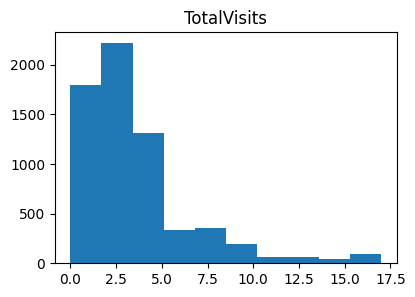

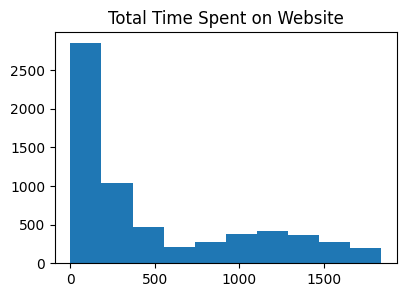

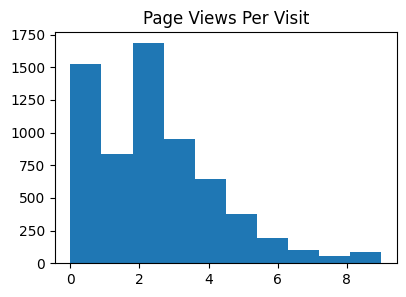

In [ ]:
feature = X_train['Page Views Per Visit']
# Histogram
# plt.subplot(221)
# plt.hist(feature)
# plt.title("Histogram")

#Analyzing features that has to be scaled for Normal Distribution
cols_scale = X_train.select_dtypes(['float64']).columns.tolist()
print('Scaling for features : ',cols_scale)

for i in cols_scale:
  plt.figure(figsize=(15,3))
  plt.subplot(1,len(cols_scale),1)
  plt.hist(X_train[i])
  plt.title(i)

  # sns.histplot(df_leads[i], kde=True, stat="density", linewidth=0)
  # plt.subplot(1,2,2)
  # sns.boxplot(y=df_leads[i],x=df_leads.Converted)
  # plt.show()

In [ ]:
#Using the MinMaxScaler to scale features in train dataset, since the features are not normally distributed
# scaler = StandardScaler()
scaler = MinMaxScaler()

X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [ ]:
#Analyzing X-train dataframe after scaling numerical variables
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
6795,0.235294,0.264586,0.147778,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3516,0.294118,0.057590,0.277778,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8105,0.294118,0.668257,0.555556,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.195942,0.262321,0.257642,0.311843,0.528139,0.079468,0.005102,0.000155,0.320810,0.190167,0.121058,0.007885,0.060297,0.014224,0.014069,0.036333,0.028293,0.381262,0.012678,0.102195,0.011905,0.072047,0.300402,0.008813,0.001391,0.292672,0.001237,0.021027,0.605133,0.077613
std,0.191627,0.295425,0.218270,0.463282,0.499246,0.270489,0.071252,0.012434,0.466824,0.392463,0.326219,0.088453,0.238054,0.118422,0.117786,0.187131,0.165822,0.485734,0.111888,0.302929,0.108466,0.258586,0.458468,0.093468,0.037279,0.455024,0.035150,0.143484,0.488860,0.267582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.006520,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.176471,0.133651,0.222222,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.503366,0.333333,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####Above table validates all columns min and max are between 0 and 1. This training dataset is fit for building the model

#Model Building

###Lets start with Automated Features Selection Using RFE (Recursive Feature Elimination)


In [ ]:
# Lets use RFE to reduce variables
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Lets interpret the results of RFE, that iteratively removes less important features to improve model performance and reduce overfitting
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Origin_Quick Add Form', False, 3),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Other Lead Source', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 12),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Other Last Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Se

In [ ]:
#Features rejected by RFE
list(X_train.columns[~rfe.support_])

['A free copy of Mastering The Interview',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Google',
 'Lead Source_Organic Search',
 'Lead Source_Other Lead Source',
 'Lead Source_Referral Sites',
 'Last Activity_Email Link Clicked',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Page Visited on Website',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed']

In [ ]:
#Features selected by RFE
cols_rfe = list(X_train.columns[rfe.support_])

In [ ]:
#Extracting Feature's columns supported by RFE into new DataFrame
X_train_rfe = X_train[cols_rfe]
X_train_rfe.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other Last Activity,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Working Professional
1871,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,0
6795,0.235294,0.264586,0.147778,0,0,0,0,0,1,0,0,0,0,0,0
3516,0.294118,0.057590,0.277778,0,1,0,0,0,1,0,0,0,0,0,0
8105,0.294118,0.668257,0.555556,0,0,0,0,0,0,0,1,0,0,0,0
3934,0.000000,0.000000,0.000000,0,1,0,0,0,1,0,0,0,0,0,0


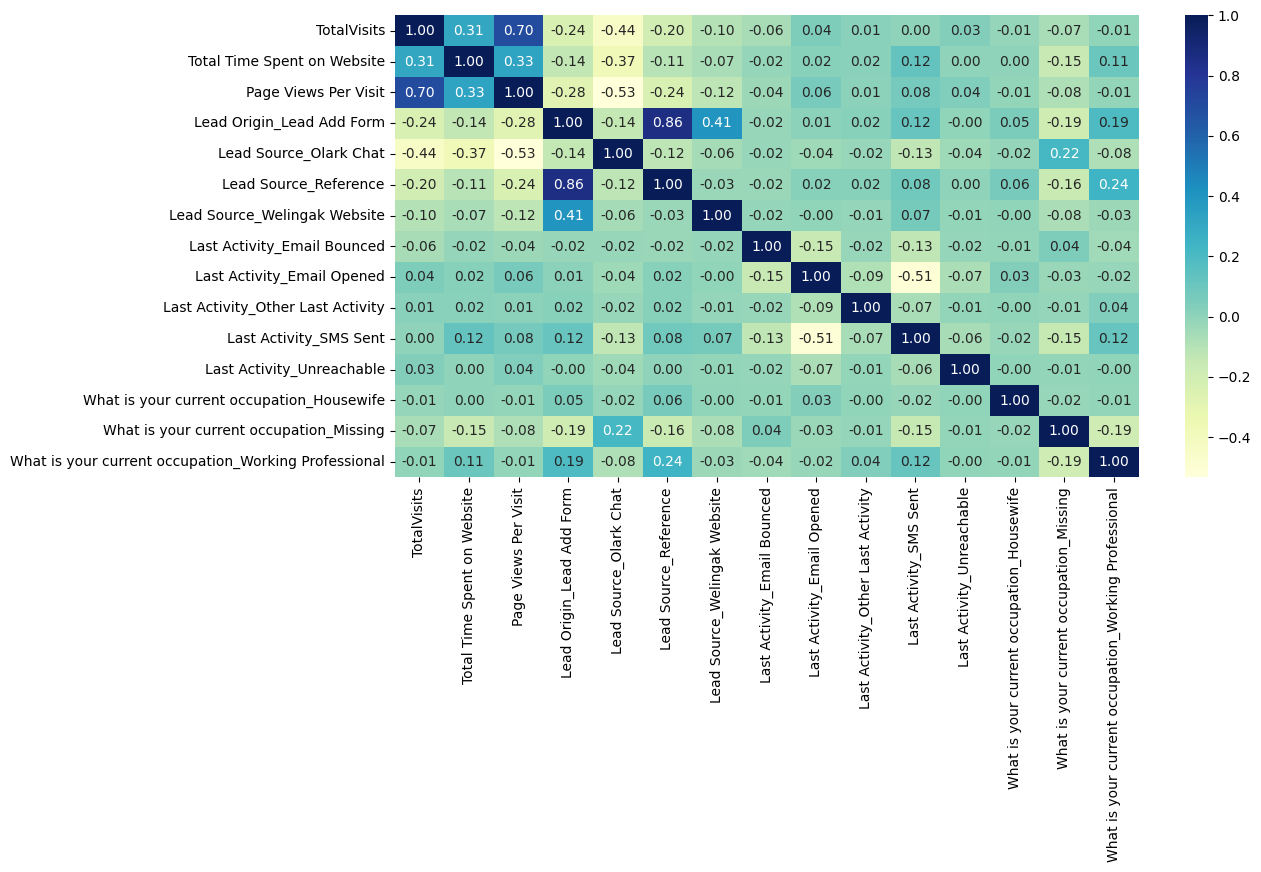

In [ ]:
#Verifying correlation between RFE Selected features
plt.figure(figsize=[12,6])
sns.heatmap(data = X_train_rfe.corr(),annot=True, cmap='YlGnBu',fmt='.2f')
plt.show()

In [ ]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

# Model_1 - Build Model with all Variables


In [ ]:
#Adding a constant variable
X_train_sm1 = sm.add_constant(X_train_rfe)

#Creating a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial())

##Fit Model
result = logm1.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.5
Date:                Mon, 22 Jan 2024   Deviance:                       5281.0
Time:                        16:47:02   Pearson chi2:                 7.24e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4012
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0416      0.127    -23.873      0.000      -3.291      -2.792
TotalVisits                                              1.7302      0.244      7.105      0.000       1.253       2.207
Total Time Spent on Website                              3.7068      0.135     27.497      0.000       3.443       3.971
Page Views Per Visit                                    -1.2677      0.243     -5.219      0.000      -1.744      -0.792
Lead Origin_Lead Add Form                                2.6785      0.471      5.690      0.000       1.756       3.601
Lead Source_Olark Chat                                   1.2559      0.122     10.306      0.000       1.017       1.495
Lead Source_Reference                                    0.7302      0.502      1.454      0.146      -0.254       1.715
Lead Source_Welingak Website                             2.6580      0.862      3.083      0.002       0.968       4.348
Last Activity_Email Bounced                             -0.9575      0.303     -3.156      0.002      -1.552      -0.363
Last Activity_Email Opened                               1.0319      0.099     10.416      0.000       0.838       1.226
Last Activity_Other Last Activity                        1.4356      0.312      4.598      0.000       0.824       2.048
Last Activity_SMS Sent                                   2.0954      0.103     20.247      0.000       1.893       2.298
Last Activity_Unreachable                                1.0579      0.360      2.942      0.003       0.353       1.763
What is your current occupation_Housewife               22.8715   1.38e+04      0.002      0.999    -2.7e+04    2.71e+04
What is your current occupation_Missing                 -1.1678      0.086    -13.533      0.000      -1.337      -0.999
What is your current occupation_Working Professional     2.5971      0.188     13.814      0.000       2.229       2.966
========================================================================================================================
"""

###Inference
The feature "What is your current occupation_Housewife" has high P-Value of 0.99 above threshold of 0.05 for statistical significance.

In [ ]:
# Hence dropping the column
cols_rfe.remove('What is your current occupation_Housewife')

print('New list of variables ',cols_rfe)

New list of variables  ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Other Last Activity', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'What is your current occupation_Missing', 'What is your current occupation_Working Professional']


# Model_2 - Build Model with Variables remaining after deleting 'What is your current occupation_Housewife'

In [ ]:
#Extracting new DataFrame with Feature's supported by RFE minus dropped features
X_train_rfe = X_train[cols_rfe]

#Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

#Creating a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial())

##Fit Model
result = logm2.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.6
Date:                Mon, 22 Jan 2024   Deviance:                       5295.2
Time:                        16:47:02   Pearson chi2:                 7.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0246      0.127    -23.824      0.000      -3.273      -2.776
TotalVisits                                              1.7144      0.243      7.048      0.000       1.238       2.191
Total Time Spent on Website                              3.7036      0.135     27.507      0.000       3.440       3.967
Page Views Per Visit                                    -1.2673      0.243     -5.222      0.000      -1.743      -0.792
Lead Origin_Lead Add Form                                2.6711      0.471      5.674      0.000       1.748       3.594
Lead Source_Olark Chat                                   1.2453      0.122     10.236      0.000       1.007       1.484
Lead Source_Reference                                    0.7575      0.502      1.508      0.131      -0.227       1.742
Lead Source_Welingak Website                             2.6540      0.862      3.078      0.002       0.964       4.344
Last Activity_Email Bounced                             -0.9689      0.303     -3.193      0.001      -1.564      -0.374
Last Activity_Email Opened                               1.0295      0.099     10.425      0.000       0.836       1.223
Last Activity_Other Last Activity                        1.4257      0.312      4.568      0.000       0.814       2.037
Last Activity_SMS Sent                                   2.0848      0.103     20.198      0.000       1.883       2.287
Last Activity_Unreachable                                1.0468      0.360      2.911      0.004       0.342       1.752
What is your current occupation_Missing                 -1.1724      0.086    -13.597      0.000      -1.341      -1.003
What is your current occupation_Working Professional     2.5886      0.188     13.774      0.000       2.220       2.957
========================================================================================================================
"""

###Inference
The feature "Lead Source_Reference" has high P-Value of 0.131 above threshold of 0.05 for statistical significance.

In [ ]:
# Hence dropping the column
cols_rfe.remove('Lead Source_Reference')

print('New list of variables ',cols_rfe)

New list of variables  ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Other Last Activity', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'What is your current occupation_Missing', 'What is your current occupation_Working Professional']


# Model_3 - Build Model with Variables remaining after deleting 'Lead Source_Reference'

In [ ]:
#Extracting new DataFrame with Feature's supported by RFE minus dropped features
X_train_rfe = X_train[cols_rfe]

#Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

#Creating a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial())

##Fit Model
result = logm3.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.6
Date:                Mon, 22 Jan 2024   Deviance:                       5297.2
Time:                        16:47:03   Pearson chi2:                 7.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3997
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0204      0.127    -23.810      0.000      -3.269      -2.772
TotalVisits                                              1.7115      0.243      7.037      0.000       1.235       2.188
Total Time Spent on Website                              3.7022      0.135     27.502      0.000       3.438       3.966
Page Views Per Visit                                    -1.2711      0.243     -5.238      0.000      -1.747      -0.795
Lead Origin_Lead Add Form                                3.3332      0.199     16.788      0.000       2.944       3.722
Lead Source_Olark Chat                                   1.2418      0.122     10.209      0.000       1.003       1.480
Lead Source_Welingak Website                             1.9919      0.749      2.659      0.008       0.524       3.460
Last Activity_Email Bounced                             -1.0064      0.305     -3.302      0.001      -1.604      -0.409
Last Activity_Email Opened                               1.0301      0.099     10.437      0.000       0.837       1.224
Last Activity_Other Last Activity                        1.4070      0.313      4.490      0.000       0.793       2.021
Last Activity_SMS Sent                                   2.0815      0.103     20.180      0.000       1.879       2.284
Last Activity_Unreachable                                1.0488      0.359      2.921      0.003       0.345       1.752
What is your current occupation_Missing                 -1.1721      0.086    -13.595      0.000      -1.341      -1.003
What is your current occupation_Working Professional     2.5931      0.188     13.809      0.000       2.225       2.961
========================================================================================================================
"""

###Inference
 P value for all the selected features are <0.05

###Checking the VIF Values

In [ ]:
# Now checking VIFs for all variables in the Model 3
get_vif(X_train_rfe)

,Features,VIF
0,Page Views Per Visit,5.18
1,TotalVisits,3.98
2,Total Time Spent on Website,2.09
3,Last Activity_Email Opened,2.06
4,Last Activity_SMS Sent,1.96
5,Lead Origin_Lead Add Form,1.51
6,What is your current occupation_Missing,1.45
7,Lead Source_Olark Chat,1.41
8,Lead Source_Welingak Website,1.24
9,What is your current occupation_Working Profes...,1.19


###Inference
The feature "Page Views Per Visit" has high VIF value of 5.18 above threshold of 5

In [ ]:
#Hence dropping the column
cols_rfe.remove('Page Views Per Visit')

print('New list of variables ',cols_rfe)

New list of variables  ['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Last Activity_Email Bounced', 'Last Activity_Email Opened', 'Last Activity_Other Last Activity', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'What is your current occupation_Missing', 'What is your current occupation_Working Professional']


# Model_4 - Build Model with Variables remaining after deleting 'Page Views Per Visit'

In [ ]:
#Extracting new DataFrame with Feature's supported by RFE minus dropped features
X_train_rfe = X_train[cols_rfe]

#Adding a constant variable
X_train_sm4 = sm.add_constant(X_train_rfe)

#Creating a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial())

##Fit Model
result = logm4.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2662.6
Date:                Mon, 22 Jan 2024   Deviance:                       5325.1
Time:                        16:47:03   Pearson chi2:                 7.24e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2208      0.122    -26.451      0.000      -3.459      -2.982
TotalVisits                                              1.0333      0.207      4.981      0.000       0.627       1.440
Total Time Spent on Website                              3.6793      0.134     27.430      0.000       3.416       3.942
Lead Origin_Lead Add Form                                3.5669      0.194     18.403      0.000       3.187       3.947
Lead Source_Olark Chat                                   1.4823      0.114     13.048      0.000       1.260       1.705
Lead Source_Welingak Website                             2.0014      0.748      2.675      0.007       0.535       3.468
Last Activity_Email Bounced                             -1.0133      0.306     -3.307      0.001      -1.614      -0.413
Last Activity_Email Opened                               0.9735      0.098      9.972      0.000       0.782       1.165
Last Activity_Other Last Activity                        1.3654      0.313      4.362      0.000       0.752       1.979
Last Activity_SMS Sent                                   1.9991      0.101     19.745      0.000       1.801       2.197
Last Activity_Unreachable                                0.9789      0.361      2.713      0.007       0.272       1.686
What is your current occupation_Missing                 -1.1671      0.086    -13.575      0.000      -1.336      -0.999
What is your current occupation_Working Professional     2.5742      0.187     13.764      0.000       2.208       2.941
========================================================================================================================
"""

###Inference
 P value for all the selected features are <0.05

###Checking the VIF Values

In [ ]:
# Now checking VIFs for all variables in the Model 4
get_vif(X_train_rfe)

,Features,VIF
0,TotalVisits,2.15
1,Total Time Spent on Website,2.05
2,Last Activity_Email Opened,1.83
3,Last Activity_SMS Sent,1.73
4,Lead Origin_Lead Add Form,1.48
5,What is your current occupation_Missing,1.43
6,Lead Source_Olark Chat,1.34
7,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.19
9,Last Activity_Email Bounced,1.06


#NOTE: No variable needs to be dropped as they all have good VIF values less than 5 along with p-values for all variables is less than 0.05

##Hence Model 4 is being finalized and will make the prediction on the Train Set


In [ ]:
y_train_pred = result.predict(X_train_sm4)
y_train_pred[:10]

1871    0.317563
6795    0.262952
3516    0.438020
8105    0.823591
3934    0.317563
4844    0.990029
3297    0.160850
8071    0.994232
987     0.063090
7423    0.889433
dtype: float64

In [ ]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
1871,0,0.317563,1871
6795,0,0.262952,6795
3516,0,0.438020,3516
8105,0,0.823591,8105
3934,0,0.317563,3934


In [ ]:
# Creating 'predicted' column with 1 if Converted_Prob > 0.5 else 0, using 0.5 as the cut-off probability.

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
1871,0,0.317563,1871,0
6795,0,0.262952,6795,0
3516,0,0.438020,3516,0
8105,0,0.823591,8105,1
3934,0,0.317563,3934,0


#Model Evaluation

###Checking overall accuracy of Trained model

In [ ]:
#Accuracy - Proportion of total predictions that are correct

print(round((metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))*100,2))

81.71


##Confusion Matrix  (Actual / predicted)

In [ ]:
confusion_matrixx = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion_matrixx)

[[3556  446]
 [ 737 1729]]


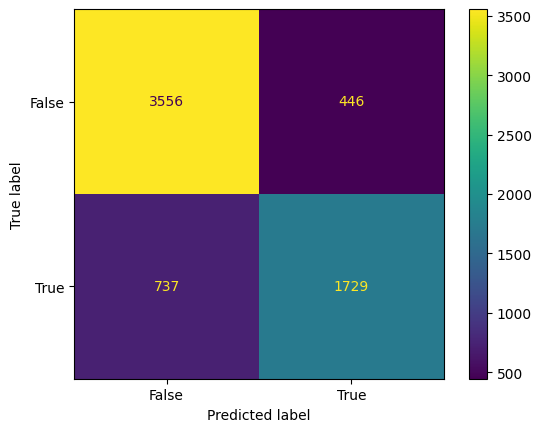

In [ ]:

confusion_matrix_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrixx,display_labels=["False","True"])
confusion_matrix_display.plot()
plt.show()


In [ ]:
#Other Metrics
#  TP- True Positives , TN - True Negatives , FP - False Positives, FN - False Negatives ]
TN = confusion_matrixx[0,0] # true negatives
FP = confusion_matrixx[0,1] # false positives
FN = confusion_matrixx[1,0] # false negatives
TP = confusion_matrixx[1,1] # true positive

print('TN - ',TN,', FP - ',FP,', FN - ',FN,', TP - ',TP)

#Accuracy - Proportion of total predictions that are correct
accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy : ',round(accuracy*100,2))

# Specificity - True Negative Rate - Proportion of actual negatives that are correctly predicted	as 0
specificity = TN / (TN + FP)
print('Specificity : ',round(specificity*100,2))

# Recall(Sensitivity) - True posiite rate - how many are correctly identified as 1
recall = TP / (TP + FN)
print('Recall / Sensitivity  : ',round(recall*100,2))

# Precision - Proportion of predicted positives that are actually positive
precision = TP /(TP + FP)
print('Precision : ',round(precision*100,2))

# F1 Score

print('F1 Score - ',round(2 * ((precision * recall) / (precision + recall)) * 100,2))

TN -  3556 , FP -  446 , FN -  737 , TP -  1729
Accuracy :  81.71
Specificity :  88.86
Recall / Sensitivity  :  70.11
Precision :  79.49
F1 Score -  74.51


##Inference
### Specificity of model is good at 88%, but sensitivity is moderate and is only at around 70% indicating model was better at identifying Negative cases than Positive Cases.
### Low Sensitivity could be because of high cut-off probability 0.5 was chosen. To improve sensitivity, we will optimize cut-off point using ROC Curve

##ROC Curve
###shows tradeoff between the True Positive Rate (Sensitivity) and the False Positive Rate (Specificity) - any increase in Sensitivity will be accompanied by a decrease in Specificity


In [ ]:


def roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

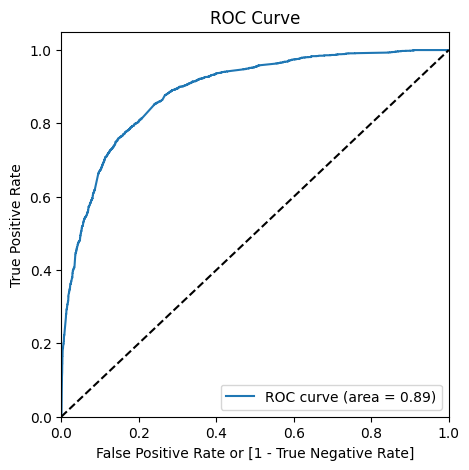

In [ ]:
roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### ROC Curve is closer to left and top border of ROC Space, while Area under curve is 89% that is positive indicator of having good model

##Finding Optimal Cutoff Point
#### Optimal cut-off probability is where we get balanced Sensitivty and Specificity

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.317563,1871,0,1,1,1,1,0,0,0,0,0,0
6795,0,0.262952,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0,0.438020,3516,0,1,1,1,1,1,0,0,0,0,0
8105,0,0.823591,8105,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.317563,3934,0,1,1,1,1,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.614255  0.975669  0.391554
0.2   0.2  0.753247  0.915653  0.653173
0.3   0.3  0.790816  0.858070  0.749375
0.4   0.4  0.816017  0.762368  0.849075
0.5   0.5  0.817100  0.701135  0.888556
0.6   0.6  0.795609  0.591241  0.921539
0.7   0.7  0.783241  0.521898  0.944278
0.8   0.8  0.752474  0.401460  0.968766
0.9   0.9  0.718151  0.281833  0.987006


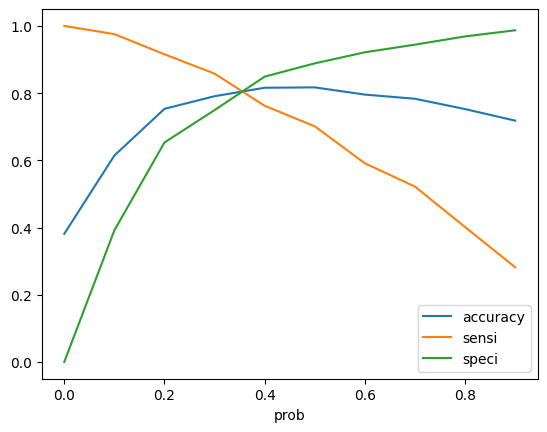

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
## from the above plot its visible that , 0.35 is the optimum point to be considered as a cutoff probability.
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()



,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
1871,0,0.317563,1871,0,1,1,1,1,0,0,0,0,0,0,0
6795,0,0.262952,6795,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.438020,3516,0,1,1,1,1,1,0,0,0,0,0,1
8105,0,0.823591,8105,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.317563,3934,0,1,1,1,1,0,0,0,0,0,0,0


In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
1871,0,0.317563,1871,0,1,1,1,1,0,0,0,0,0,0,0,32
6795,0,0.262952,6795,0,1,1,1,0,0,0,0,0,0,0,0,26
3516,0,0.438020,3516,0,1,1,1,1,1,0,0,0,0,0,1,44
8105,0,0.823591,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
3934,0,0.317563,3934,0,1,1,1,1,0,0,0,0,0,0,0,32


#Model Evaluation

In [ ]:
y_train_pred_final

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
1871,0,0.317563,1871,0,1,1,1,1,0,0,0,0,0,0,0,32
6795,0,0.262952,6795,0,1,1,1,0,0,0,0,0,0,0,0,26
3516,0,0.438020,3516,0,1,1,1,1,1,0,0,0,0,0,1,44
8105,0,0.823591,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
3934,0,0.317563,3934,0,1,1,1,1,0,0,0,0,0,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,1,0.789112,350,1,1,1,1,1,1,1,1,1,0,0,1,79
79,1,0.995870,79,1,1,1,1,1,1,1,1,1,1,1,1,100
8039,1,0.317563,8039,0,1,1,1,1,0,0,0,0,0,0,0,32
6936,0,0.067641,6936,0,1,0,0,0,0,0,0,0,0,0,0,7


In [ ]:
#Accuracy - Proportion of total predictions that are correct

print(round((metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Final_Predicted"]))*100,2))

80.67


In [ ]:
confusion_matrixx2 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Final_Predicted"])
print(confusion_matrixx2)

[[3261  741]
 [ 509 1957]]


In [ ]:
#Other Metrics
#  TP- True Positives , TN - True Negatives , FP - False Positives, FN - False Negatives ]
TN = confusion_matrixx2[0,0] # true negatives
FP = confusion_matrixx2[0,1] # false positives
FN = confusion_matrixx2[1,0] # false negatives
TP = confusion_matrixx2[1,1] # true positive

print('TN - ',TN,', FP - ',FP,', FN - ',FN,', TP - ',TP)

#Accuracy - Proportion of total predictions that are correct
accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy : ',round(accuracy*100,2))

# Specificity - True Negative Rate - Proportion of actual negatives that are correctly predicted	as 0
specificity = TN / (TN + FP)
print('Specificity : ',round(specificity*100,2))

# Recall(Sensitivity) - True posiite rate - how many are correctly identified as 1
recall = TP / (TP + FN)
print('Recall / Sensitivity  : ',round(recall*100,2))

# Precision - Proportion of predicted positives that are actually positive
precision = TP /(TP + FP)
print('Precision : ',round(precision*100,2))

# F1 Score

print('F1 Score - ',round(2 * ((precision * recall) / (precision + recall)) * 100,2))

TN -  3261 , FP -  741 , FN -  509 , TP -  1957
Accuracy :  80.67
Specificity :  81.48
Recall / Sensitivity  :  79.36
Precision :  72.54
F1 Score -  75.79


In [ ]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

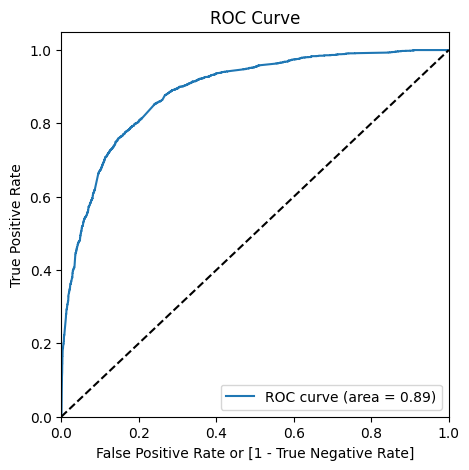

In [ ]:
roc(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

In [ ]:
precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

(array([0.3812616 , 0.38132055, 0.38137952, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        8.11030008e-04, 4.05515004e-04, 0.00000000e+00]),
 array([0.00512489, 0.00534774, 0.00546157, ..., 0.99905997, 0.99937671,
        0.99945619]))

In [ ]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

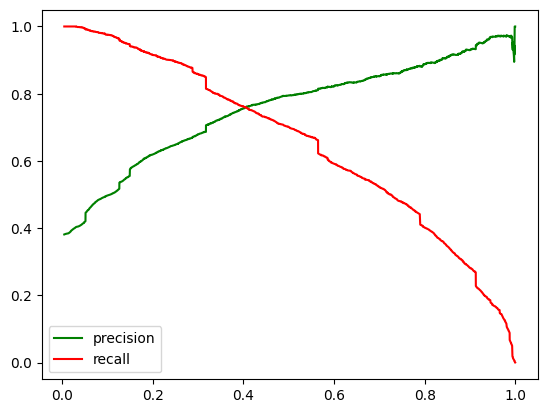

In [ ]:
plt.plot(thresholds,p[:-1],"g-",label='precision')
plt.plot(thresholds,r[:-1],"r-",label='recall')
plt.legend()
plt.show()


###The optimal cut-off point as per precision-recall curve is ~0.4 and it matches closely with sensitivity - specificity trade-off

#Making Prediction on Test Data
##Data Preparation - Feature Scaling

In [ ]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,8.0,1011.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2376,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7766,5.0,59.0,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9199,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4359,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
cols_scale_test = X_test.select_dtypes('float64').columns.tolist()
print('Scaling for features : ',cols_scale_test)

#Scaling for selected features
X_test[cols_scale_test] = scaler.fit_transform(X_test[cols_scale_test])

Scaling for features :  ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [ ]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4269,0.470588,0.549274,0.888889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2376,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7766,0.294118,0.032055,0.555556,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9199,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4359,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_test.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Last Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.195314,0.268986,0.261447,0.314214,0.530303,0.073593,0.007937,0.0,0.300866,0.189394,0.133838,0.009740,0.051948,0.011905,0.018398,0.032828,0.030303,0.387446,0.012266,0.112554,0.012626,0.062771,0.289322,0.012987,0.000361,0.287518,0.002886,0.026696,0.608225,0.073593
std,0.185874,0.297384,0.220839,0.464286,0.499171,0.261155,0.088749,0.0,0.458717,0.391892,0.340540,0.098229,0.221962,0.108477,0.134411,0.178219,0.171451,0.487255,0.110088,0.316104,0.111675,0.242594,0.453529,0.113239,0.018993,0.452687,0.053654,0.161221,0.488235,0.261155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.007063,0.111111,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.176471,0.140171,0.222222,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.515590,0.388889,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####Above table validates all columns min and max are between 0 and 1. This training dataset is fit for building the model

#Model Building

###Lets start with Automated Features Selection Using RFE (Recursive Feature Elimination)


In [ ]:
# Lets use RFE to reduce variables
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_test, y_test)

#Lets interpret the results of RFE, that iteratively removes less important features to improve model performance and reduce overfitting
list(zip(X_test.columns,rfe.support_,rfe.ranking_))


[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 12),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 8),
 ('Lead Source_Other Lead Source', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Last Activity', False, 3),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Se

In [ ]:
#Features rejected by RFE
list(X_test.columns[~rfe.support_])

['A free copy of Mastering The Interview',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Google',
 'Lead Source_Organic Search',
 'Lead Source_Other Lead Source',
 'Lead Source_Referral Sites',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Form Submitted on Website',
 'Last Activity_Other Last Activity',
 'Last Activity_Page Visited on Website',
 'Last Activity_Unreachable',
 'What is your current occupation_Housewife']

In [ ]:
#Features selected by RFE
cols_rfex = list(X_test.columns[rfe.support_])

###Select features given by RFE

In [ ]:
X_test_rfe = X_test[cols_rfe]
X_test_rfe.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other Last Activity,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Missing,What is your current occupation_Working Professional
4269,0.470588,0.549274,0,0,0,0,0,0,1,0,1,0
2376,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0
7766,0.294118,0.032055,0,0,0,0,0,0,0,1,0,1
9199,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0
4359,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0


###Adding Constant

In [ ]:
X_test_sm1 = sm.add_constant(X_test_rfe)

In [ ]:
X_test_sm1

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other Last Activity,Last Activity_SMS Sent,Last Activity_Unreachable,What is your current occupation_Missing,What is your current occupation_Working Professional
4269,1.0,0.470588,0.549274,0,0,0,0,0,0,1,0,1,0
2376,1.0,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0
7766,1.0,0.294118,0.032055,0,0,0,0,0,0,0,1,0,1
9199,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0
4359,1.0,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.882353,0.157556,0,0,0,0,0,0,0,0,1,0
2152,1.0,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0
7101,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0
5331,1.0,0.176471,0.873623,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_test_pred = result.predict(X_test_sm1)
y_test_pred[:10]

4269    0.529543
2376    0.912546
7766    0.680098
9199    0.149502
4359    0.789112
9186    0.590564
1631    0.520376
8963    0.178106
8007    0.028805
5324    0.327487
dtype: float64

In [ ]:
# converting y_test to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
4269,0.529543
2376,0.912546
7766,0.680098
9199,0.149502
4359,0.789112


In [ ]:
# converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [ ]:
# putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.529543
1,1,2376,0.912546
2,1,7766,0.680098
3,0,9199,0.149502
4,1,4359,0.789112


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Let's verify the y_pred_final head
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.529543
1,1,2376,0.912546
2,1,7766,0.680098
3,0,9199,0.149502
4,1,4359,0.789112


In [ ]:
#Rearranging columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'],axis=1)

y_pred_final['Final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Final_Predicted
0,4269,1,0.529543,1
1,2376,1,0.912546,1
2,7766,1,0.680098,1
3,9199,0,0.149502,0
4,4359,1,0.789112,1


In [ ]:
# Let's check the overall accuracy.
print(round((metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted))*100,2))

79.73


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["Final_Predicted"])
confusion_matrix

array([[1355,  322],
       [ 240,  855]])

In [ ]:
#Other Metrics
#  TP- True Positives , TN - True Negatives , FP - False Positives, FN - False Negatives ]
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives
TP = confusion_matrix[1,1] # true positive

print('TN - ',TN,', FP - ',FP,', FN - ',FN,', TP - ',TP)

#Accuracy - Proportion of total predictions that are correct
accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy : ',round(accuracy*100,2))

# Specificity - True Negative Rate - Proportion of actual negatives that are correctly predicted	as 0
specificity = TN / (TN + FP)
print('Specificity : ',round(specificity*100,2))

# Recall(Sensitivity) - True posiite rate - how many are correctly identified as 1
recall = TP / (TP + FN)
print('Recall / Sensitivity  : ',round(recall*100,2))

# Precision - Proportion of predicted positives that are actually positive
precision = TP /(TP + FP)
print('Precision : ',round(precision*100,2))

# F1 Score

print('F1 Score - ',round(2 * ((precision * recall) / (precision + recall)) * 100,2))

TN -  1355 , FP -  322 , FN -  240 , TP -  855
Accuracy :  79.73
Specificity :  80.8
Recall / Sensitivity  :  78.08
Precision :  72.64
F1 Score -  75.26


In [ ]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Final_Predicted,Lead_Score
0,4269,1,0.529543,1,53
1,2376,1,0.912546,1,91
2,7766,1,0.680098,1,68
3,9199,0,0.149502,0,15
4,4359,1,0.789112,1,79


In [ ]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
1871,0,0.317563,1871,0,1,1,1,1,0,0,0,0,0,0,0,32
6795,0,0.262952,6795,0,1,1,1,0,0,0,0,0,0,0,0,26
3516,0,0.438020,3516,0,1,1,1,1,1,0,0,0,0,0,1,44
8105,0,0.823591,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
3934,0,0.317563,3934,0,1,1,1,1,0,0,0,0,0,0,0,32


In [ ]:
print(df_leads.shape)
print(y_train_pred_final.shape)
print(y_pred_final.shape)

(9240, 31)
(6468, 16)
(2772, 5)


In [ ]:
#List significant features contributed to model
result.params.sort_values(ascending=False)

Total Time Spent on Website                             3.679293
Lead Origin_Lead Add Form                               3.566878
What is your current occupation_Working Professional    2.574249
Lead Source_Welingak Website                            2.001442
Last Activity_SMS Sent                                  1.999066
Lead Source_Olark Chat                                  1.482302
Last Activity_Other Last Activity                       1.365358
TotalVisits                                             1.033275
Last Activity_Unreachable                               0.978944
Last Activity_Email Opened                              0.973518
Last Activity_Email Bounced                            -1.013307
What is your current occupation_Missing                -1.167131
const                                                  -3.220814
dtype: float64